In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the file
data= pd.read_csv('emails.csv')

In [3]:
data

,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...,...,...,...
48071,48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,48074,campbell-l/notes_inbox/136.,<26024436.1075857876659.JavaMail.evans@thyme>,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


In [4]:
list(data)

['Unnamed: 0', 'filename', 'Message-ID', 'content', 'Class']

In [5]:
data.shape

(48076, 5)

In [6]:
data.nunique()

Unnamed: 0    48076
filename      48076
Message-ID    48076
content       24656
Class             2
dtype: int64

In [7]:
data.dtypes

Unnamed: 0     int64
filename      object
Message-ID    object
content       object
Class         object
dtype: object

In [8]:
data.isnull().sum()

Unnamed: 0    0
filename      0
Message-ID    0
content       0
Class         0
dtype: int64

In [9]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48071    False
48072    False
48073    False
48074    False
48075    False
Length: 48076, dtype: bool

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48076 entries, 0 to 48075
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  48076 non-null  int64 
 1   filename    48076 non-null  object
 2   Message-ID  48076 non-null  object
 3   content     48076 non-null  object
 4   Class       48076 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


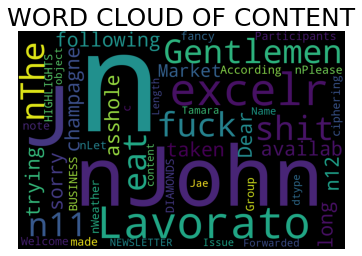

In [11]:
# let's see the words cloud for content 

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, width = 1200, height = 800).generate(str(data['content']))

plt.rcParams['figure.figsize'] = (20, 20)
plt.title('WORD CLOUD OF CONTENT', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [12]:
class_counts = data['Class'].value_counts()
print(class_counts)

Non Abusive    44666
Abusive         3410
Name: Class, dtype: int64


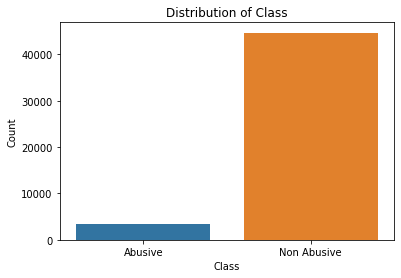

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Class')
plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

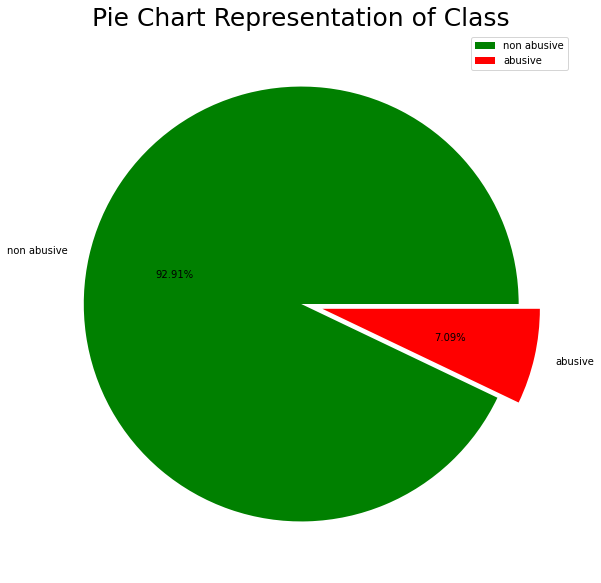

In [14]:
# a pie chart to represent the abusive and non abusive class

size = [44666, 3410]
colors = ['green', 'red']
labels = "non abusive","abusive"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Class', fontsize = 25)
plt.legend()
plt.show()

In [15]:
df = data[data['Class'] == 'Abusive']

In [16]:
df

,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...,...,...,...
3405,3405,zipper-a/sent_items/367.,<14695903.1075861170942.JavaMail.evans@thyme>,There is a lot of confused bullshit floating a...,Abusive
3406,3406,zipper-a/sent_items/37.,<6945064.1075842017346.JavaMail.evans@thyme>,"wow, three weeks away from the kids ! brave an...",Abusive
3407,3407,zipper-a/sent_items/382.,<1237276.1075861171270.JavaMail.evans@thyme>,\ngot this from late friday. have you ever hea...,Abusive
3408,3408,zufferli-j/deleted_items/109.,<30324039.1075842024203.JavaMail.evans@thyme>,"\n\n -----Original Message-----\nFrom: \t""Enge...",Abusive


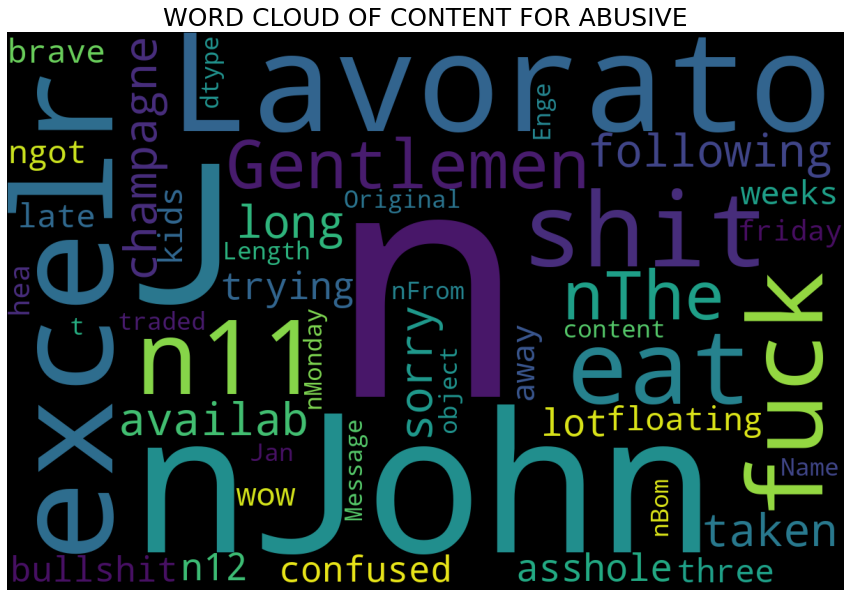

In [17]:
# let's see the words cloud for content for class of abusive

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, width = 1200, height = 800).generate(str(df['content']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('WORD CLOUD OF CONTENT FOR ABUSIVE', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [18]:
df1 = data[data['Class'] == 'Non Abusive']
df1

,Unnamed: 0,filename,Message-ID,content,Class
3410,3410,allen-p/_sent_mail/1.,<18782981.1075855378110.JavaMail.evans@thyme>,Here is our forecast\n\n,Non Abusive
3411,3411,allen-p/_sent_mail/10.,<15464986.1075855378456.JavaMail.evans@thyme>,Traveling to have a business meeting takes the...,Non Abusive
3412,3412,allen-p/_sent_mail/100.,<24216240.1075855687451.JavaMail.evans@thyme>,test successful. way to go!!!,Non Abusive
3413,3413,allen-p/_sent_mail/1000.,<13505866.1075863688222.JavaMail.evans@thyme>,"Randy,\n\n Can you send me a schedule of the s...",Non Abusive
3414,3414,allen-p/_sent_mail/1001.,<30922949.1075863688243.JavaMail.evans@thyme>,Let's shoot for Tuesday at 11:45.,Non Abusive
...,...,...,...,...,...
48071,48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,48074,campbell-l/notes_inbox/136.,<26024436.1075857876659.JavaMail.evans@thyme>,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


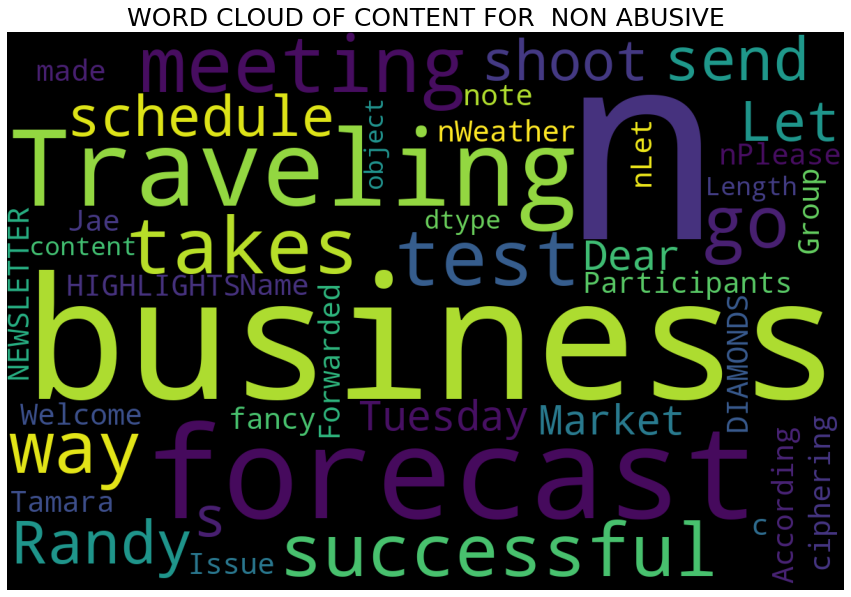

In [19]:
# let's see the words cloud for content for class of non abusive

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, width = 1200, height = 800).generate(str(df1['content']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('WORD CLOUD OF CONTENT FOR  NON ABUSIVE', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

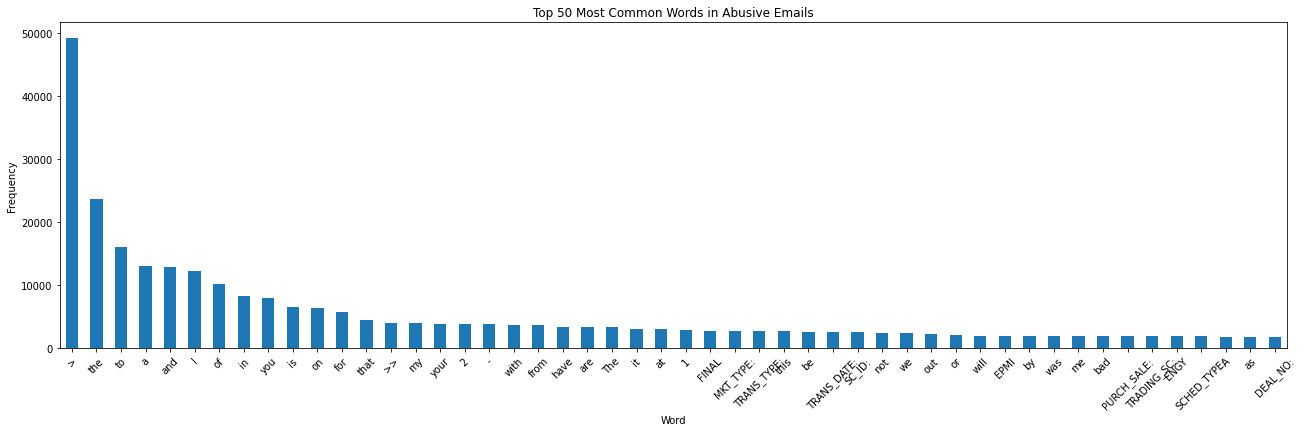

In [20]:
# Most common words in abusive emails
abusive_emails = data[data['Class'] == 'Abusive']
abusive_words = ' '.join(abusive_emails['content']).split()
abusive_word_freq = pd.Series(abusive_words).value_counts()
plt.figure(figsize=(22, 6))
abusive_word_freq[:50].plot(kind='bar')
plt.title('Top 50 Most Common Words in Abusive Emails')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

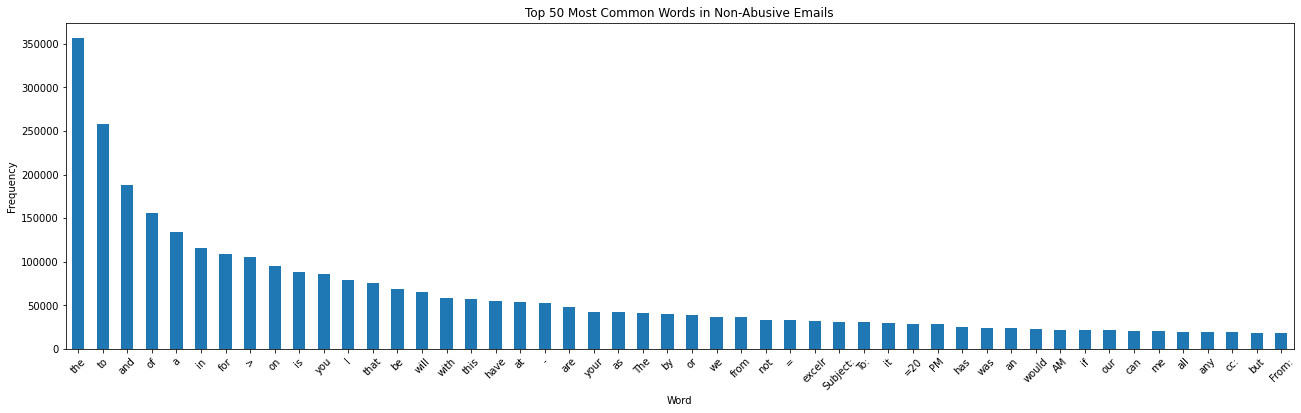

In [21]:
# Most common words in non-abusive emails
non_abusive_emails = data[data['Class'] == 'Non Abusive']
non_abusive_words = ' '.join(non_abusive_emails['content']).split()
non_abusive_word_freq = pd.Series(non_abusive_words).value_counts()
plt.figure(figsize=(22, 6))
non_abusive_word_freq[:50].plot(kind='bar')
plt.title('Top 50 Most Common Words in Non-Abusive Emails')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [22]:
new = data.drop(['Unnamed: 0','filename', 'Message-ID' ],axis = 1)

In [23]:
new

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...
48071,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


In [24]:
new['content'][0]

'eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/18/2000 01:01 PM\nTo: John Arnold/HOU/ECT@ECT\ncc:  \nSubject: \n\nFootball bets 200 each\n\nMinn -9.5\nBuff +2.5\nPhil -7\nIndi -4.5\nCinnci +7\nDet +6\nclev +16\nDen +9.5\nDall +7.5\nJack +3.5\n\n\n'

In [25]:
new['content'][4]

"asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23/2000 10:51 AM\nTo: John Arnold/HOU/ECT@ECT\ncc:  \nSubject: \n\njohn\n\n\nI cant' seem to make my gambling problem go away.\n\nbills +3 250\ndenver -7 250\njack +3 1/2 250\n\n\n"

In [26]:
for i, col in enumerate(new.columns):
    if new[col].dtype == 'object':  # Check if column data type is string
        new.iloc[:, i] = new.iloc[:, i].str.replace('""', '')
    else:
        new.iloc[:, i] = new.iloc[:, i].astype(str).str.replace('""', '')


In [27]:
new

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...
48071,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


In [28]:
from nltk.corpus import stopwords

stop = stopwords.words('english')

In [29]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
print(porter.stem("sportingly"))
print(porter.stem("very"))
print(porter.stem("troubled"))

sportingli
veri
troubl


In [32]:
nltk.download('omw-1.4')
print(lemmatizer.lemmatize("sportingly"))
print(lemmatizer.lemmatize("very"))
print(lemmatizer.lemmatize("troubled"))

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


sportingly
very
troubled


In [33]:
from bs4 import BeautifulSoup
import re
import string

In [34]:
def content_to_words(raw_content):
    # delete html 
    content_text = BeautifulSoup(raw_content,'html.parser').get_text()
    # make a space
    latters_only = re.sub('[^a-zA-Z]', ' ',content_text)
    # lower letters
    words = latters_only.lower().split()
    # stop words
    meaningful_words = [w for w in words if not w in stop]
    # lemmitization
    lemmatize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    #space join words
    return(' '.join(lemmatize_words))

In [35]:
new['content_clean']=new['content'].apply(content_to_words)

In [36]:
new.head()

,content,Class,content_clean
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive,eat shit john j lavorato excelr pm john arnold...
1,fuck you,Abusive,fuck
2,Gentlemen:\nThe following champagne is availab...,Abusive,gentleman following champagne available approx...
3,sorry i've taken so long...just been trying to...,Abusive,sorry taken long trying fend chick life sooooo...
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive,asshole john j lavorato excelr john arnold hou...


In [37]:
new.tail()

,content,Class,content_clean
48071,"Dear Market Participants,\n\nPlease note the c...",Non Abusive,dear market participant please note change pla...
48072,"According to my fancy ciphering we made $310,0...",Non Abusive,according fancy ciphering made month november ...
48073,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive,business highlight weather group let give big ...
48074,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive,welcome diamond newsletter issue special holid...
48075,---------------------- Forwarded by Tamara Jae...,Non Abusive,forwarded tamara jae black hou ect pm nicki da...


In [38]:
df2 = new[new['Class'] == 'Abusive']

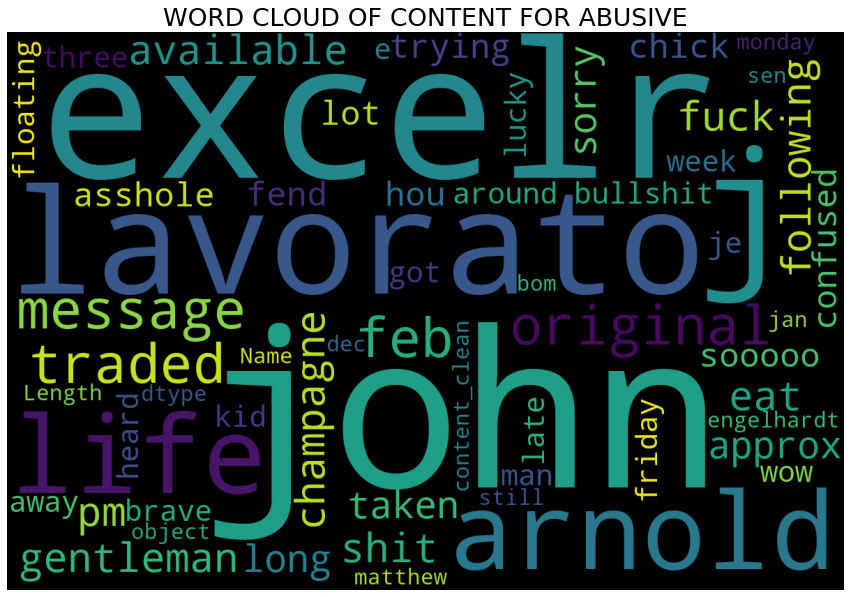

In [39]:
# let's see the words cloud for content for class of abusive

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, width = 1200, height = 800).generate(str(df2['content_clean']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('WORD CLOUD OF CONTENT FOR ABUSIVE', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [40]:
df3 = new[new['Class'] == 'Non Abusive']

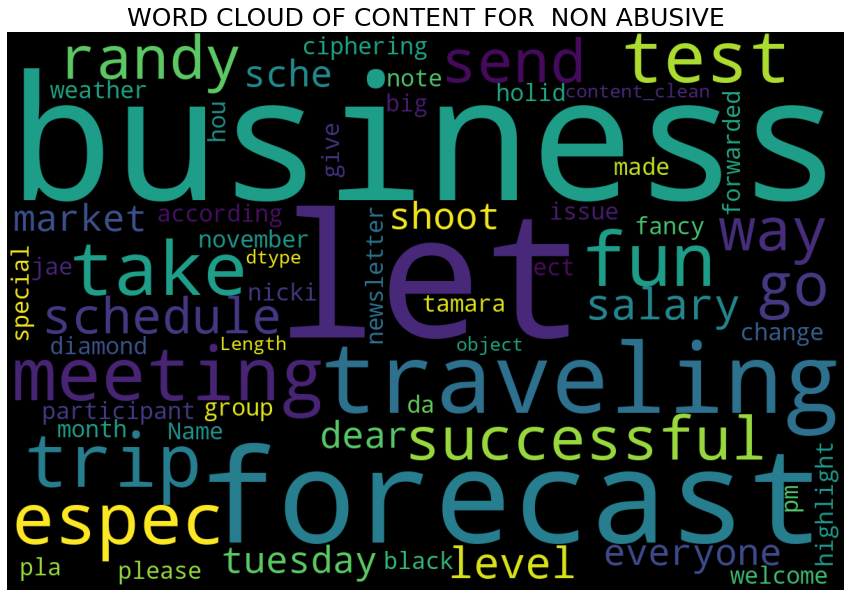

In [41]:
# let's see the words cloud for content for class of non abusive

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, width = 1200, height = 800).generate(str(df3['content_clean']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('WORD CLOUD OF CONTENT FOR  NON ABUSIVE', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [54]:
df_sample = pd.read_csv('emails.csv',index_col=0)
df_sample

,filename,Message-ID,content,Class
0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...,...,...
48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,campbell-l/notes_inbox/136.,<26024436.1075857876659.JavaMail.evans@thyme>,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


In [55]:
df_sample.drop(columns=['filename','Message-ID'],inplace=True)
df_sample

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...
48071,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


In [56]:
df_sample.drop_duplicates(inplace=True)

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_sample['target_class']= le.fit_transform(df_sample['Class'])

# 0 = Abusive
# 1 = Non-Abusive

In [59]:
df_sample['content_clean']=df_sample['content'].apply(content_to_words)

In [61]:
df_sample.drop(columns=['content', 'Class'], inplace=True)

In [78]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter



# Separate features (X) and target labels (y)
X = df_sample.drop('target_class', axis=1)  # Update with your target column name
y = df_sample['target_class']  # Update with your target column name

# Display class distribution before undersampling
print("Class distribution before undersampling:", Counter(y))

# Initialize RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Undersample the majority class
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Display class distribution after undersampling
print("Class distribution after undersampling:", Counter(y_resampled))

# Create new DataFrame with resampled data
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['target_class'] = y_resampled  # Update with your target column name

# Save the resampled DataFrame to a new CSV file
resampled_df.to_csv('resampled_data.csv', index=False)  # Update with desired file name


Class distribution before undersampling: Counter({1: 23014, 0: 1642})
Class distribution after undersampling: Counter({0: 1642, 1: 1642})


In [79]:
resampled_df

,content_clean,target_class
0,eat shit john j lavorato excelr pm john arnold...,0
1,fuck,0
2,gentleman following champagne available approx...,0
3,sorry taken long trying fend chick life sooooo...,0
4,asshole john j lavorato excelr john arnold hou...,0
...,...,...
23907,thanks sending date writing already home calen...,1
21123,original message nolen glaze smtp nglaze oilst...,1
16126,look awful lot like snow original message sent...,1
42804,tx rick original message gorny vladimir sent m...,1


In [90]:
from sklearn.feature_extraction.text import CountVectorizer

In [91]:
cv = CountVectorizer()

In [92]:
x = cv.fit_transform(resampled_df['content_clean']).toarray()

In [94]:
y = resampled_df['target_class'].values

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [97]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [98]:
gnb = GaussianNB()
mb = MultinomialNB()
ber = BernoulliNB()

In [99]:
gnb.fit(xtrain,ytrain)
ypred1 = gnb.predict(xtest)
print(accuracy_score(ytest,ypred1))
print(confusion_matrix(ytest,ypred1))
print(precision_score(ytest,ypred1))

0.821501014198783
[[439  59]
 [117 371]]
0.8627906976744186


In [100]:
mb.fit(xtrain,ytrain)
ypred2 = mb.predict(xtest)
print(accuracy_score(ytest,ypred2))
print(confusion_matrix(ytest,ypred2))
print(precision_score(ytest,ypred2))

0.8955375253549696
[[421  77]
 [ 26 462]]
0.8571428571428571


In [101]:
ber.fit(xtrain,ytrain)
ypred3 = ber.predict(xtest)
print(accuracy_score(ytest,ypred3))
print(confusion_matrix(ytest,ypred3))
print(precision_score(ytest,ypred3))

0.8722109533468559
[[456  42]
 [ 84 404]]
0.905829596412556


In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [103]:
tfidf = TfidfVectorizer()

In [104]:
x = tfidf.fit_transform(resampled_df['content_clean']).toarray()

In [106]:
y = resampled_df['target_class'].values

In [107]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [108]:
gnb.fit(xtrain,ytrain)
ypred1 = gnb.predict(xtest)
print(accuracy_score(ytest,ypred1))
print(confusion_matrix(ytest,ypred1))
print(precision_score(ytest,ypred1))

0.8235294117647058
[[412  86]
 [ 88 400]]
0.823045267489712


In [109]:
mb.fit(xtrain,ytrain)
ypred2 = mb.predict(xtest)
print(accuracy_score(ytest,ypred2))
print(confusion_matrix(ytest,ypred2))
print(precision_score(ytest,ypred2))

0.9036511156186613
[[438  60]
 [ 35 453]]
0.8830409356725146


In [110]:
ber.fit(xtrain,ytrain)
ypred3 = ber.predict(xtest)
print(accuracy_score(ytest,ypred3))
print(confusion_matrix(ytest,ypred3))
print(precision_score(ytest,ypred3))

0.8722109533468559
[[456  42]
 [ 84 404]]
0.905829596412556


In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier

In [112]:
svc = SVC(kernel='sigmoid',gamma=1.0)
lg = LogisticRegression()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bbc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [113]:
# creating fore loop To train all above algo
cls = {
    'SVC' : svc,
    'Lg' : lg,
    'NB':mnb,
    'DTC':dtc,
    'Rfc':rfc,
    'ABC':abc,
    'BBC':bbc,
    'ETC':etc,
    'GBC':gbc,
    'XGB':xgb
}

In [114]:
def train_classifier(clf,xtrain,ytrain,xtest,ytest):
  clf.fit(xtrain,ytrain)
  ypred=clf.predict(xtest)
  accuracy__score = accuracy_score(ytest,ypred)
  precision__score = precision_score(ytest,ypred)
  return accuracy__score,precision__score

In [115]:
svc= train_classifier(svc,xtrain,ytrain,xtest,ytest)
svc

(0.936105476673428, 0.958963282937365)

In [116]:
lg = train_classifier(lg,xtrain,ytrain,xtest,ytest)
lg

(0.9320486815415822, 0.9526881720430107)

In [117]:
mnb = train_classifier(mnb,xtrain,ytrain,xtest,ytest)
mnb

(0.9036511156186613, 0.8830409356725146)

In [118]:
dtc = train_classifier(dtc,xtrain,ytrain,xtest,ytest)
dtc

(0.757606490872211, 0.825065274151436)

In [119]:
rfc = train_classifier(rfc,xtrain,ytrain,xtest,ytest)
rfc

(0.8874239350912779, 0.8631984585741811)

In [120]:
abc = train_classifier(abc,xtrain,ytrain,xtest,ytest)
abc

(0.8610547667342799, 0.8742004264392325)

In [121]:
etc = train_classifier(etc,xtrain,ytrain,xtest,ytest)
etc

(0.9006085192697769, 0.875)

In [122]:
gbc = train_classifier(gbc,xtrain,ytrain,xtest,ytest)
gbc

(0.8417849898580122, 0.8772727272727273)

In [123]:
xgb = train_classifier(xgb,xtrain,ytrain,xtest,ytest)
xgb

(0.8914807302231237, 0.906183368869936)

In [124]:
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb = MultinomialNB()
lg = LogisticRegression()

from sklearn.ensemble import VotingClassifier

In [125]:
voting = VotingClassifier(estimators=[('svc',svc),('nb',mnb),('lg',lg)],voting='soft')

In [126]:
voting.fit(xtrain,ytrain)

VotingClassifier(estimators=[('svc',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('lg', LogisticRegression())],
                 voting='soft')

In [127]:
ypred = voting.predict(xtest)
print("Accuracy_score",accuracy_score(ytest,ypred))
print("Precision_score",precision_score(ytest,ypred))

Accuracy_score 0.936105476673428
Precision_score 0.9511677282377919


In [129]:
import pickle

In [130]:
pickle.dump(tfidf,open('vector.pkl','wb'))
pickle.dump(svc,open('model.pkl','wb'))

In [131]:
import joblib

In [132]:
joblib.dump(tfidf,open('vector.job','wb'))
joblib.dump(svc,open('model.job','wb'))